Ovo je primer kako mogu da se vizuelizuju javno dosupni podaci na internetu u vezi sa COVID-19 pandemijom. Primer je urađen kao Jupyter Notebook sa R kernelom. 

Ako zanemarimo pouzdanost podataka, o čemu bi inače uvek trebalo da vodite računa, postoji niz tehničkih problema koje treba rešavati. Ovde će biti prikazani neki uobičajeni. Ideja da vidite probleme i neke mogućnosti za njihovo rešavanje. Sve ovo može elegantnije, ali to sad nije najvažnije.

Za početak, treba da učitamo najnovije podatke sa [COVID-19 github repozitorijuma Johns Hopkins univerziteta](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). Na ovom sajtu možete da vidite da su posebno dati podaci za broj zaraženih, broj umrlih i broj oporavljenih do određenog dana To su tri tabele koje treba da učitamo kao iz csv fajlova. Kliknite na odgovarajuće linkove u repozitorijumu i iskopirajte URL. 

Koristimo funkciju `read.csv` za čitanje fajlova. Primetite da koristimo opciju __stringsAsFactors = F__ da bi niz podataka bio tekst, a ne faktor. 

In [1]:
# co je broj potvrđenih slučajeva zaraze
co=read.csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',stringsAsFactors = F)

In [2]:
# de je broj umrlih po zemljama
de=read.csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',stringsAsFactors = F)

In [3]:
# re je broj oporavljenih
re=read.csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',stringsAsFactors = F)

Da vidimo samo kolika je ova tabela. Funkcija `dim` nam daje dimenzije tabele. (Danas, 17. aprila, tu ima 264 država i oblasti po redovima i 90 kolona sa podacima po danima.)

In [4]:
dim(de)

[1] 264  92

Sa `head` možemo da vidimo prvih nekoliko redova, odnosno zaglavlje tabele. Parametar 20 je tu da nam prikaže prvih 20 redova.

In [5]:
head(de,20)

,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,...,X4.9.20,X4.10.20,X4.11.20,X4.12.20,X4.13.20,X4.14.20,X4.15.20,X4.16.20,X4.17.20,X4.18.20
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
3,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367
4,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,25,26,26,29,29,31,33,33,35,35
5,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
6,,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,2,2,2,2,2,2,2,3,3,3
7,,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,72,82,83,90,97,102,111,115,123,129
8,,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,10,12,13,13,14,16,17,18,19,20
9,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3


Očigledno je da se Australija, kao i neke druge zemlje, pojavljuju više puta jer su podaci dati po saveznim državama, provincijama, pokrajinama itd. Funkcija `table` će nam prikazati koliko kojih ima.

In [6]:
# Da biste izdvojili kolonu Country.Region iz tabele de kucajte de$Country.Region.
table(de$Country.Region)


                     Afghanistan                          Albania 
                               1                                1 
                         Algeria                          Andorra 
                               1                                1 
                          Angola              Antigua and Barbuda 
                               1                                1 
                       Argentina                          Armenia 
                               1                                1 
                       Australia                          Austria 
                               8                                1 
                      Azerbaijan                          Bahamas 
                               1                                1 
                         Bahrain                       Bangladesh 
                               1                                1 
                        Barbados                          Bel

Ako hoćemo da prikažemo i uporedimo podatke po zemljama onda je potrebno da agregiramo podatke za one zemlje gde su podaci dati za manje administrativne jedinice. Funkcija `aggregate` nam daje mogućnost da prođemo kroz celu listu podoblasti i sve ih saberemo. Naravno, prvo bi trebalo iz tabele izbaciti podatke koje ne treba da sabiramo (ime provincije, ime države, latituda i longituda), tj. prve četiri kolone. Iz tabele __co__ prve četiri kolone brišemo tako što u indeks kolone stavimo -(1:4). Isto treba da uradimo i za __de__ i __re__.

In [7]:
coc=co[,-(1:4)]

In [8]:
cod=aggregate(coc,list(co$Country.Region),sum)

Od tabele __co__ pravimo dve __coc__ u kojima nema prve četiri kolone, i __cod__ u kojima su podaci agregirani po državama. Slično ćemo uraditi i za tabele __de__ i __re__.

In [9]:
dim(cod)

[1] 185  89

In [10]:
head(cod,20)

,Group.1,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,X1.28.20,X1.29.20,X1.30.20,...,X4.9.20,X4.10.20,X4.11.20,X4.12.20,X4.13.20,X4.14.20,X4.15.20,X4.16.20,X4.17.20,X4.18.20
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
2,Albania,0,0,0,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
3,Algeria,0,0,0,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
4,Andorra,0,0,0,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
5,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,19,19,21,21,23,23,23,23,23,23
7,Argentina,0,0,0,0,0,0,0,0,0,...,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758
8,Armenia,0,0,0,0,0,0,0,0,0,...,921,937,967,1013,1039,1067,1111,1159,1201,1248
9,Australia,0,0,0,0,4,5,5,6,9,...,6108,6215,6303,6315,6351,6415,6440,6462,6522,6547


In [11]:
dec=de[,-(1:4)]
ded=aggregate(dec,list(de$Country.Region),sum)

In [12]:
rec=re[,-(1:4)]
red=aggregate(rec,list(re$Country.Region),sum)

In [13]:
dim(ded)

[1] 185  89

Pretpostavljamo da su podaci za __cod__, __ded__ i __red__ sortirani na isti način, prema imenu države, ali nije loše da to proverimo. Vizuelno, možemo da ispišemo imena država iz sve tri tabele jednu pored druge pa da vidimo da li se svugde poklapaju. Funkcija `cbind` nam omogućava da spojimo kolone.  

In [14]:
cbind(cod$Group.1,ded$Group.1,red$Group.1)

Afghanistan,Afghanistan,Afghanistan
Albania,Albania,Albania
Algeria,Algeria,Algeria
Andorra,Andorra,Andorra
Angola,Angola,Angola
Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda
Argentina,Argentina,Argentina
Armenia,Armenia,Armenia
Australia,Australia,Australia
Austria,Austria,Austria
Azerbaijan,Azerbaijan,Azerbaijan


Deluje da je sve u redu. Sada možemo da izračunamo broj aktivnih slučajeva po državama i danima tako što od broja potvrđenih slučajeva oduzmemo broj umrlih i broj oporavljenih: act=cod-ded-red. Mali problem predstavlja to što tabele imaju na početku kolonu sa imenima država, a imena se ne sabiraju. Najlakše je da isključimo tu prvu kolonu tako što u indeks kolone stavimo -1.

In [15]:
act=cod[,-1]-ded[,-1]-red[,-1]

In [16]:
# broj aktivnih slučajeva po državama i danima
head(act)

,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,X1.28.20,X1.29.20,X1.30.20,X1.31.20,...,X4.9.20,X4.10.20,X4.11.20,X4.12.20,X4.13.20,X4.14.20,X4.15.20,X4.16.20,X4.17.20,X4.18.20
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,...,437,474,505,557,612,651,716,756,777,791
2,0,0,0,0,0,0,0,0,0,0,...,221,211,213,206,212,203,218,215,230,220
3,0,0,0,0,0,0,0,0,0,0,...,1084,1100,1090,1030,1069,1053,1116,1137,1208,1273
4,0,0,0,0,0,0,0,0,0,0,...,500,504,504,481,489,500,471,471,470,464
5,0,0,0,0,0,0,0,0,0,0,...,15,15,13,13,13,12,12,12,12,16
6,0,0,0,0,0,0,0,0,0,0,...,17,17,19,19,21,18,18,17,17,17


Pošto sad u tabeli __act__ nema imena, možemo da koristimo imena iz tabela __cod__, __ded__ ili __red__.

Da vidimo sad _time line_ za jednu zemlju, npr. Nemačku, odnosno linijski dijagram broja aktivnih slučajeva po danima. Funkciju `as.numeric` koristimo da bismo podatak pretvorili u broj tipa _double_ sa kojim je lakše računati. Funkcija `lines` dodaje nove linijske dijagrame na istu sliku.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"5 y values <= 0 omitted from logarithmic plot"

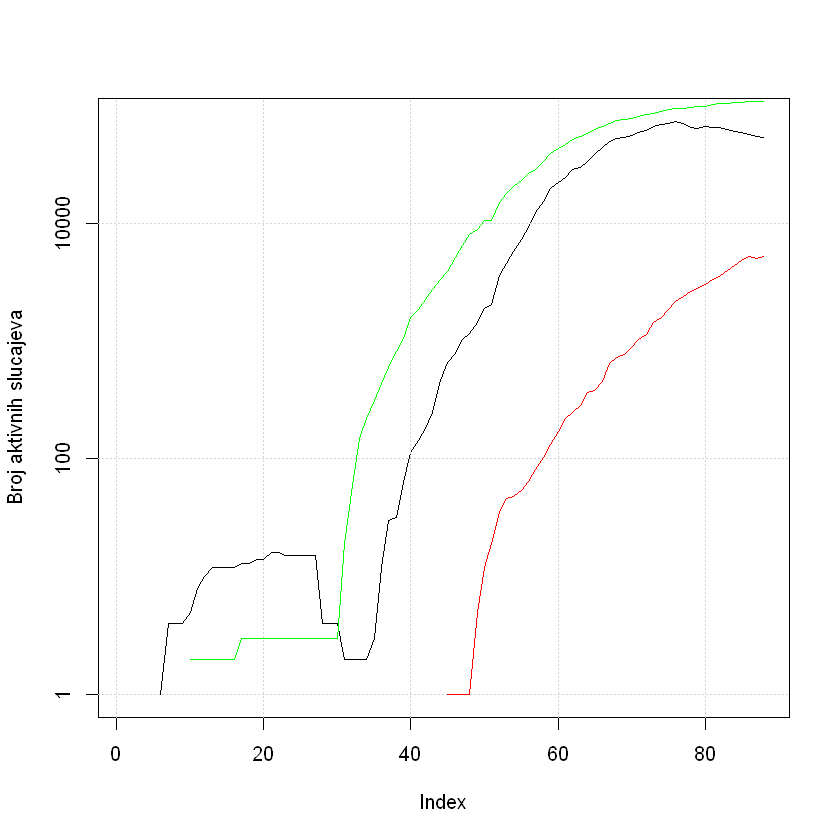

In [17]:
# type="l" se odnosi na tip grafikona, u ovom slučaju linijski
# log="y je tu da bismo imali logaritamsku skalu na y-osi 
plot(as.numeric(act[cod$Group.1=="Germany",]),col="black",
     type="l",log="y",ylab="Broj aktivnih slučajeva")
grid()
lines(as.numeric(act[cod$Group.1=="Serbia",]),col="red")
lines(as.numeric(act[cod$Group.1=="Italy",]),col="green")


Vidimo sa grafikona da je Nemačka negde oko 75-80 dana prošla maksimum broja aktivnih slučajeva i da je sad na silaznoj putanji.

Upozorenja koja smo dobili se odnose na pokušaj da izračunamo logaritam od nule. R će samo da nas upozori i da izostavi podatke za ove dane sa grafikona. Prelažem da ignorišemo ova upozorenja i produžimo dalje. ;)

Rast broja aktivnih slučajeva je bolje prikazati relativno, odnosno kao odnos brojeva aktivnih slučajeva za dva uzastopna dana kao __act[,length(act)]/act[,length(act)-1]__. Funkcija `length` nam daje broj elemenata u nekom nizu.

(Umesto odnosa dva uzastopna dana, zbog statističkog šuma u podacima, bolje je da to uradimo za više dana pa da uzmemo srednju vrednost. Tako će greška procene rasta biti manja. Ovde sam dao primer odnosa podataka za poslednji dan i podatka od pre pet dana. Pošto je rast geometrijski, a ne aritmetički računamo 5-i koren umesto da rezultat delimo sa 5. Znam da je ovo komplikacija. Samo objašnjavam zašto u sledećem redu imamo eksponencijalnu funkciju i logaritme.)

In [18]:
rast=exp((log(act[,length(act)])-log(act[,length(act)-5]))/5) # log varijanta

In [19]:
# podacima o rastu možemo da pridružimo i imena država
names(rast)=as.character(cod$Group.1)

In [20]:
head(rast,10)

Afghanistan             Albania             Algeria             Andorra 
          1.0526525           1.0074358           1.0355478           0.9895593 
             Angola Antigua and Barbuda           Argentina             Armenia 
          1.0424022           0.9586188           1.0402379           0.9716569 
          Australia             Austria 
          0.8792289           0.9129242

Kod zemalja sa malim brojem slučajeva rast može mnogo da varira pa ćemo zato isključiti iz tabele sve države koje danas imaju manje od 100 aktivnih slučajeva. Posle toga ćemo rast da izrazimo u procentima, odnosno da umesto odnosa 1.09 kažemo da je rast 9%.

In [21]:
rast=rast[act[,length(act)]>100]

In [22]:
# dnevni rast u procentima
rast=(rast-1)*100

Ovde dolazimo do trenutka kad bi bilo lepo da na mapi prikažemo koliko raste broj aktivnih slučajeva po zemljama. Za to nam je potrebno da učitamo neke biblioteke za crtanje.

In [23]:
# Ove biblioteke su nam potrebne za crtanje mapa
library(RColorBrewer)
library(rgdal)

Warning message:
"package 'rgdal' was built under R version 3.6.2"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.2"rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/srdjan/Documents/R/win-library/3.6/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/srdjan/Documents/R/win-library/3.6/rgdal/proj
 Linking to sp version: 1.3-2 


U bibliotaci __rgdal__ postoji funkcija `readOGR` kojom možemo da pročitamo "shape" fajl sa konturama svih država na planeti. Kad to učitamo imaćemo moći ćemo da crtamo mape, odnosno grafikone tipa "choropleth". Ne morate ovim da se zamarate. Jupyter notebook omogućava da to sačuvamo i modifikujemo kad zatreba.

In [24]:
konture <- readOGR( 
  dsn= paste0(getwd(),"/TM_WORLD_BORDERS_SIMPL-0.3.shp") , 
  layer="TM_WORLD_BORDERS_SIMPL-0.3",
  verbose=FALSE
)

Promenljiva __konture__ ima vrlo složenu strukturu. Tu osim samih kontura imamo i osnovne podatke o svakoj zemlji.

In [25]:
head(konture@data)

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534
5,AO,AO,AGO,24,Angola,124670,16095214,2,17,17.544,-12.296


Za potrebe ove demonstracije prikazaćemo samo Evropu i njeno neposredno okruženje.

In [26]:
# Selektujemo evropske zemlje i još neke u okruženju prema geografskoj dužini i širini
evropa <- konture[konture@data$REGION == 150 
                  | (konture@data$LON>-19 & konture@data$LON<55)
                  & (konture@data$LAT>20 & konture@data$LAT<65), ]

Tabeli __evropa@data__ ćemo dodati jednu kolonu pod nazivom rast. Za početak će u celoj koloni biti vrednost NA ( _not avalable_ ).

In [27]:
evropa@data$rast=NA

Sledeći zadatak je povezati vrednosti iz niza __rast__ sa odgovarajućim državama iz tabele __evropa@data__. Moraćemo da pronađemo gde se ime države iz niza __rast__ nalazi u tabeli. Za to koristimo funkciju `match`.

In [28]:
pozicije_imena=match(names(rast),evropa@data$NAME)

In [29]:
pozicije_imena

[1] NA  3  1 42 NA  4 NA 13  2  5 NA 31 40 NA  6 NA  7 NA NA NA NA NA NA NA NA
 [26] NA NA 20 NA  8 NA  9 NA NA NA 10 NA 12 15 16 17 18 NA 19 NA NA NA 21 22 NA
 [51] NA NA 26 11 24 25 NA NA 27 NA NA NA NA 28 NA 30 29 32 45 NA NA 39 NA NA NA
 [76] 48 37 50 NA NA NA NA 51 NA NA NA NA NA NA 52 53 54 55 57 69 58 NA 71 NA 33
[101] 59 NA NA 60 NA 61 63 NA NA NA 64 65 67 68 66 NA NA NA NA NA

Očigledno je neke imena nekih država nemoguće pronaći u tabeli. One nisu u Evropi i njenoj okolini. Na tim mestima se u nizu __pozicija_imena__ nalazi NA. Istini za volju, ovako nećemo pronaći još neke zemlje jer imaju različita imena na ova dva mesta, npr. Czechia i Czech Republic ili North Macedonia i BYRM. To možemo da popravimo, ali nije posebno važno za ovu demonstraciju. Ostavićemo i ovde NA.

Umesto niza __pozicija_imena__ možemo da koristimo onaj gde su samo prepoznata imena, tj. niz gde su NA vrednosti isključene. Funkcija `na.omit` za to služi.

In [30]:
na.omit(pozicije_imena)

[1]  3  1 42  4 13  2  5 31 40  6  7 20  8  9 10 12 15 16 17 18 19 21 22 26 11
[26] 24 25 27 28 30 29 32 45 39 48 37 50 51 52 53 54 55 57 69 58 71 33 59 60 61
[51] 63 64 65 67 68 66
attr(,"na.action")
 [1]   1   5   7  11  14  16  18  19  20  21  22  23  24  25  26  27  29  31  33
[20]  34  35  37  43  45  46  47  50  51  52  57  58  60  61  62  63  65  70  71
[39]  73  74  75  79  80  81  82  84  85  86  87  88  89  97  99 102 103 105 108
[58] 109 110 116 117 118 119 120
attr(,"class")
[1] "omit"

In [31]:
evropa@data$rast[na.omit(pozicije_imena)]=rast[!is.na(pozicije_imena)]

In [32]:
head(evropa@data,10)

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,rast
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,3.5547775
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,-2.0159007
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,0.7435763
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,-2.8343092
9,BA,BH,BHR,48,Bahrain,71,724788,142,145,50.562,26.019,5.7624638
15,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,2.1991078
21,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,3.2824719
43,CY,CY,CYP,196,Cyprus,924,836321,142,145,33.219,35.043,2.7504630
44,DA,DK,DNK,208,Denmark,4243,5416945,150,154,9.264,56.058,-4.3647500


Paleta boja __RdYlGn__ koja je zgodna za prikazivanje boja od crvene do zelene ima samo 11 boja. Zato je potrebno da vrednosti za __rast__ grubo svrstamo u 11 kategorija. Funkcija `cut` deli ceo raspon vrednosti na intervale.

In [33]:
# Attribute the appropriate color to each country
kategorija <- cut(evropa@data$rast, breaks=seq(-16.5,16.5,by=3))
boje=brewer.pal(11, "RdYlGn")

Da ne bi najmanje vrednosti imale crvenu boju, a najveće zelenu, obrnućemo redosled. Umesto boja od 1 do 11, uzimamo 12 - (od 1 do 11), tj. od 11 do 1.

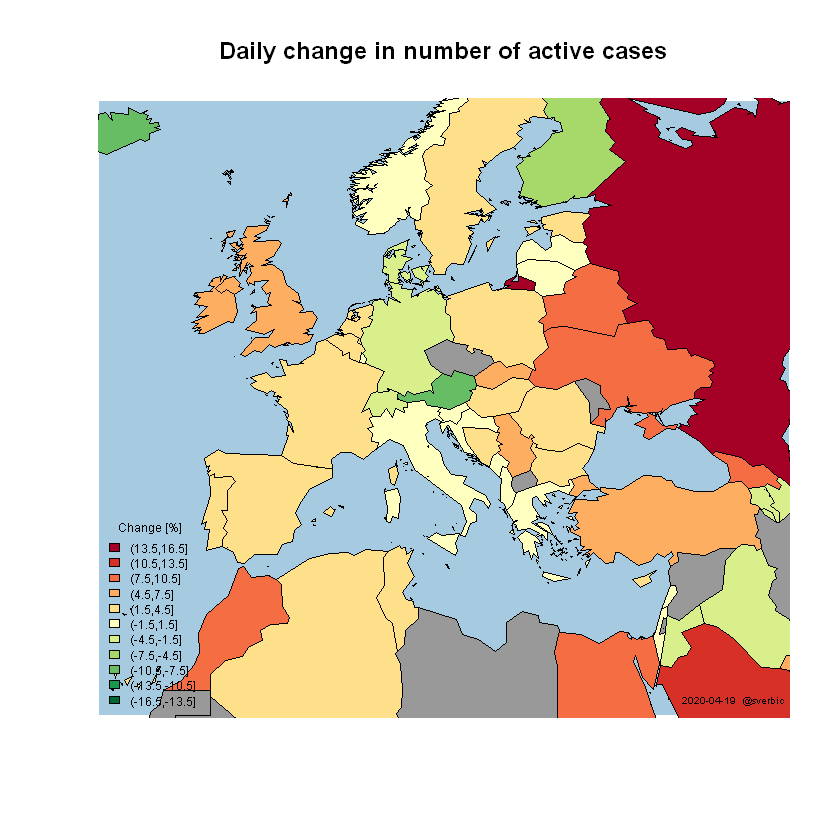

In [34]:
boje=boje[12-as.numeric(kategorija)]
# za zemlje koje nisu prepoznate stavljamo sivu boju (#999999)
boje[is.na(evropa@data$rast)]="#999999"
 
# Choropleth
plot(evropa , xlim=c(-17,45) , ylim=c(45,48), col=boje ,  bg = "#A6CAE0")
title('Daily change in number of active cases')
legend("bottomleft",
  legend = rev(levels(kategorija)), # i ovde moramo da obrnemo redosled 
  title = "Change [%]",
  fill = brewer.pal(11, "RdYlGn"),
  cex = 0.6,
  bty = "n")
text(42,27,paste(as.character(Sys.Date())," @sverbic"),cex=.5)

Konačno, dobili smo choropleth gde se vidi u kojim zemljama još uvek ubrzano raste broj aktivnih slučajeva (crvenkasto), a u kojima opada (zelenkasto). Ostaje nam da se nadamo da će u dogledno vreme sve pozeleneti.